<a href="https://colab.research.google.com/github/RaicLee/Jpub_AI22/blob/master/3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Activation, Dense, Dropout,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
(train_data,train_label),(test_data,test_label)=boston_housing.load_data()
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [3]:
columns_name=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
print(columns_name)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


In [4]:
df=pd.DataFrame(train_data,columns=columns_name)
print(df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
0  1.23247   0.0   8.14   0.0  0.538  ...   4.0  307.0     21.0  396.90  18.72
1  0.02177  82.5   2.03   0.0  0.415  ...   2.0  348.0     14.7  395.38   3.11
2  4.89822   0.0  18.10   0.0  0.631  ...  24.0  666.0     20.2  375.52   3.26
3  0.03961   0.0   5.19   0.0  0.515  ...   5.0  224.0     20.2  396.90   8.01
4  3.69311   0.0  18.10   0.0  0.713  ...  24.0  666.0     20.2  391.43  14.65

[5 rows x 13 columns]


In [5]:
print(train_label[:10])

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [6]:
print(train_data.shape)
order=np.argsort(np.random.random(train_label.shape))
#order is value mixed in range of 0 to 403
train_data=train_data[order]
train_label=train_label[order]

(404, 13)


In [7]:
mean=train_data.mean(axis=0)
print(mean.shape)

(13,)


In [8]:
std=train_data.std(axis=0)
print(std.shape)

(13,)


In [9]:
train_data=(train_data-mean)/std
print(train_data)
mean=test_data.mean(axis=0)
std=test_data.std(axis=0)
test_data=(test_data-mean)/std
print(test_data)

[[-3.97252690e-01  1.41205707e+00 -1.12664623e+00 ... -1.49067405e+00
   4.15841241e-01 -8.36486913e-01]
 [ 8.78463421e-02 -4.83615471e-01  1.02832580e+00 ...  7.84476371e-01
  -8.84820144e-04 -7.75760075e-01]
 [-3.95379307e-01  1.20142679e+00 -6.90065950e-01 ... -3.98601849e-01
   4.48077135e-01 -1.34714441e+00]
 ...
 [-3.61609648e-01 -4.83615471e-01 -7.20935262e-01 ... -4.89607866e-01
   4.30416546e-01  1.20338278e+00]
 [-3.98564817e-01 -4.83615471e-01 -1.03697823e+00 ... -8.53631933e-01
   3.84882016e-01 -1.02280789e+00]
 [ 3.55117151e-01 -4.83615471e-01  1.02832580e+00 ...  7.84476371e-01
  -3.70267736e-01  4.08413266e-01]]
[[ 2.8040301  -0.50784934  0.96960877 ...  0.90513041 -4.27829517
   2.51324773]
 [-0.55530596 -0.50784934 -0.17801704 ... -0.28485844  0.3909446
   0.58604286]
 [-0.56808398 -0.50784934 -0.86176938 ...  0.90513041  0.41570668
  -0.38506427]
 ...
 [-0.23539182 -0.50784934  1.17955762 ... -1.82192738  0.32313459
  -1.55879807]
 [-0.5113909  -0.50784934 -0.7184934

In [10]:
df=pd.DataFrame(train_data,columns=columns_name)
print(df.head())

       CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0 -0.397253  1.412057 -1.126646  ... -1.490674  0.415841 -0.836487
1  0.087846 -0.483615  1.028326  ...  0.784476 -0.000885 -0.775760
2 -0.395379  1.201427 -0.690066  ... -0.398602  0.448077 -1.347144
3 -0.403759  3.097099 -1.022279  ... -0.262093  0.400521 -0.880652
4 -0.348692 -0.483615 -0.720935  ... -0.489608  0.289557 -1.119419

[5 rows x 13 columns]


In [14]:
model=Sequential()
model.add(Dense(64,activation='relu',kernel_initializer='he_normal',input_shape=(13,)))
model.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1))

model.compile(optimizer=Adam(lr=0.001),loss='mse',metrics=['mae'])
early_stop=EarlyStopping(monitor='val_loss',patience=20)
history=model.fit(train_data,train_label,epochs=500,validation_split=0.2,callbacks=[early_stop])


Train on 323 samples, validate on 81 samples
Epoch 1/500
323/323 [==============================] - 0s 292us/sample - loss: 464.1768 - mean_absolute_error: 19.7539 - val_loss: 453.7449 - val_mean_absolute_error: 19.6369
Epoch 2/500
323/323 [==============================] - 0s 69us/sample - loss: 372.4583 - mean_absolute_error: 17.4444 - val_loss: 357.1695 - val_mean_absolute_error: 17.1863
Epoch 3/500
323/323 [==============================] - 0s 73us/sample - loss: 285.4160 - mean_absolute_error: 14.9813 - val_loss: 263.3344 - val_mean_absolute_error: 14.4086
Epoch 4/500
323/323 [==============================] - 0s 73us/sample - loss: 202.0045 - mean_absolute_error: 12.2856 - val_loss: 178.6349 - val_mean_absolute_error: 11.3663
Epoch 5/500
323/323 [==============================] - 0s 79us/sample - loss: 133.1447 - mean_absolute_error: 9.5918 - val_loss: 112.3157 - val_mean_absolute_error: 8.4607
Epoch 6/500
323/323 [==============================] - 0s 65us/sample - loss: 82.9960 

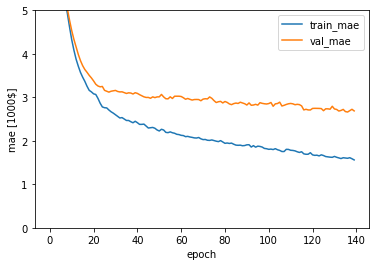

In [15]:
plt.plot(history.history['mean_absolute_error'],label='train_mae')
plt.plot(history.history['val_mean_absolute_error'],label='val_mae')
plt.xlabel('epoch')
plt.ylabel('mae [1000$]')
plt.legend(loc='best')
plt.ylim([0,5])
plt.show()

In [16]:
test_loss,test_mae=model.evaluate(test_data,test_label)
print('loss: {:3f}\nmae: {:3f}'.format(test_loss,test_mae))


102/102 [==============================] - 0s 109us/sample - loss: 20.0944 - mean_absolute_error: 3.0544
loss: 20.094358
mae: 3.054415


In [21]:
print("real:   ",np.round(test_label[:10]))
test_predictions=model.predict(test_data[:10]).flatten()
print("predict:",np.round(test_predictions))

real:    [ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
predict: [ 7. 21. 24. 28. 29. 21. 27. 23. 19. 23.]
